In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Golf Dataset**

In [10]:
path = "/gdrive/My Drive/ML:March2020/data/"
data = pd.read_csv(path+"golf_weather.csv")
data.head(20)

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [11]:
data.shape

(14, 5)

In [12]:
print("total examples = {}".format(data.shape[0]))

total examples = 14


In [13]:
from sklearn.preprocessing import LabelEncoder

outlook_encoder=LabelEncoder()
data["OUTLOOK"]=outlook_encoder.fit_transform(data["OUTLOOK"])

temp_encoder=LabelEncoder()
data["TEMPERATURE"]=temp_encoder.fit_transform(data["TEMPERATURE"])

hum_encoder=LabelEncoder()
data["HUMIDITY"]=hum_encoder.fit_transform(data["HUMIDITY"])

windy_encoder=LabelEncoder()
data["WINDY"]=windy_encoder.fit_transform(data["WINDY"])

play_encoder=LabelEncoder()
data["PLAY GOLF"]=play_encoder.fit_transform(data["PLAY GOLF"])

In [14]:
data

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini")

In [16]:
y=data["PLAY GOLF"]
x=data.drop(columns=["PLAY GOLF"])

In [17]:
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
Label="PLAY GOLF"
features=x.columns
features 

Index(['OUTLOOK', 'TEMPERATURE', 'HUMIDITY', 'WINDY'], dtype='object')

In [22]:
from sklearn.tree import export_graphviz
from pydotplus import  graphviz as gr

export_graphviz(model,out_file="dtree.dot",feature_names=features,class_names=Label,rounded=True,precision=4,filled=True)

graph=gr.graph_from_dot_file("dtree.dot")

graph.write_png("tree.png")

True

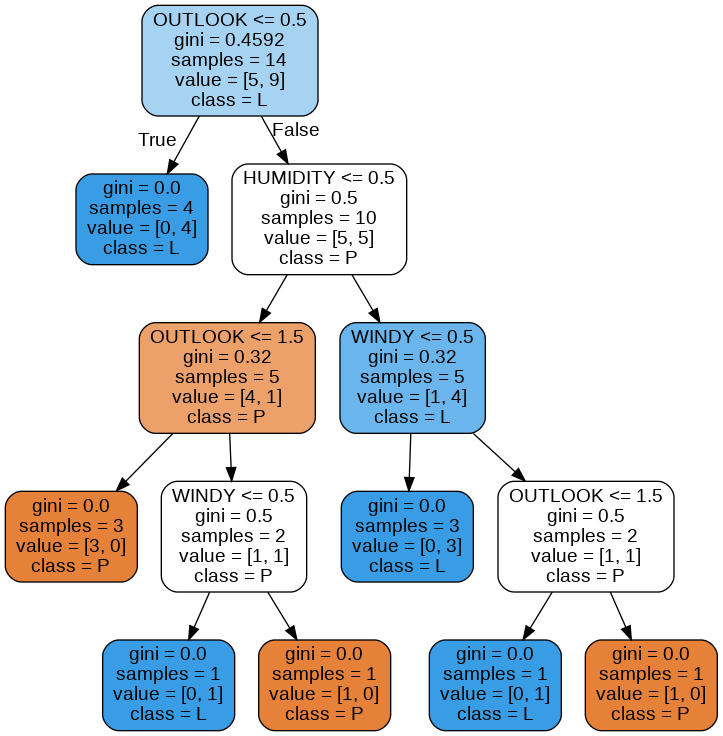

In [23]:
from PIL import Image
from IPython.display import display

im=Image.open("tree.png")
display(im)

**Brest cancer dataset**

In [27]:
path = "/gdrive/My Drive/ML:March2020/data/"
cancer = pd.read_csv(path+"breast_cancer_wisconsin_data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
tumor_encoder=LabelEncoder()
cancer["diagnosis"]=tumor_encoder.fit_transform(cancer["diagnosis"])
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [37]:
cancer_x=data.drop(columns=["Unnamed: 32",'id','diagnosis'])
cancer_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
cancer_y=cancer['diagnosis']
cancer_y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cancer_x,cancer_y,test_size=0.25,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [41]:
cancer_tree=DecisionTreeClassifier(criterion="gini")
cancer_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
Label="diagnosis"
features=cancer_x.columns
features 

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [43]:
export_graphviz(cancer_tree,out_file="Cancer_dtree.dot",feature_names=features,class_names=Label,rounded=True,precision=4,filled=True)

graph=gr.graph_from_dot_file("Cancer_dtree.dot")

graph.write_png("Cancer_tree.png")

True

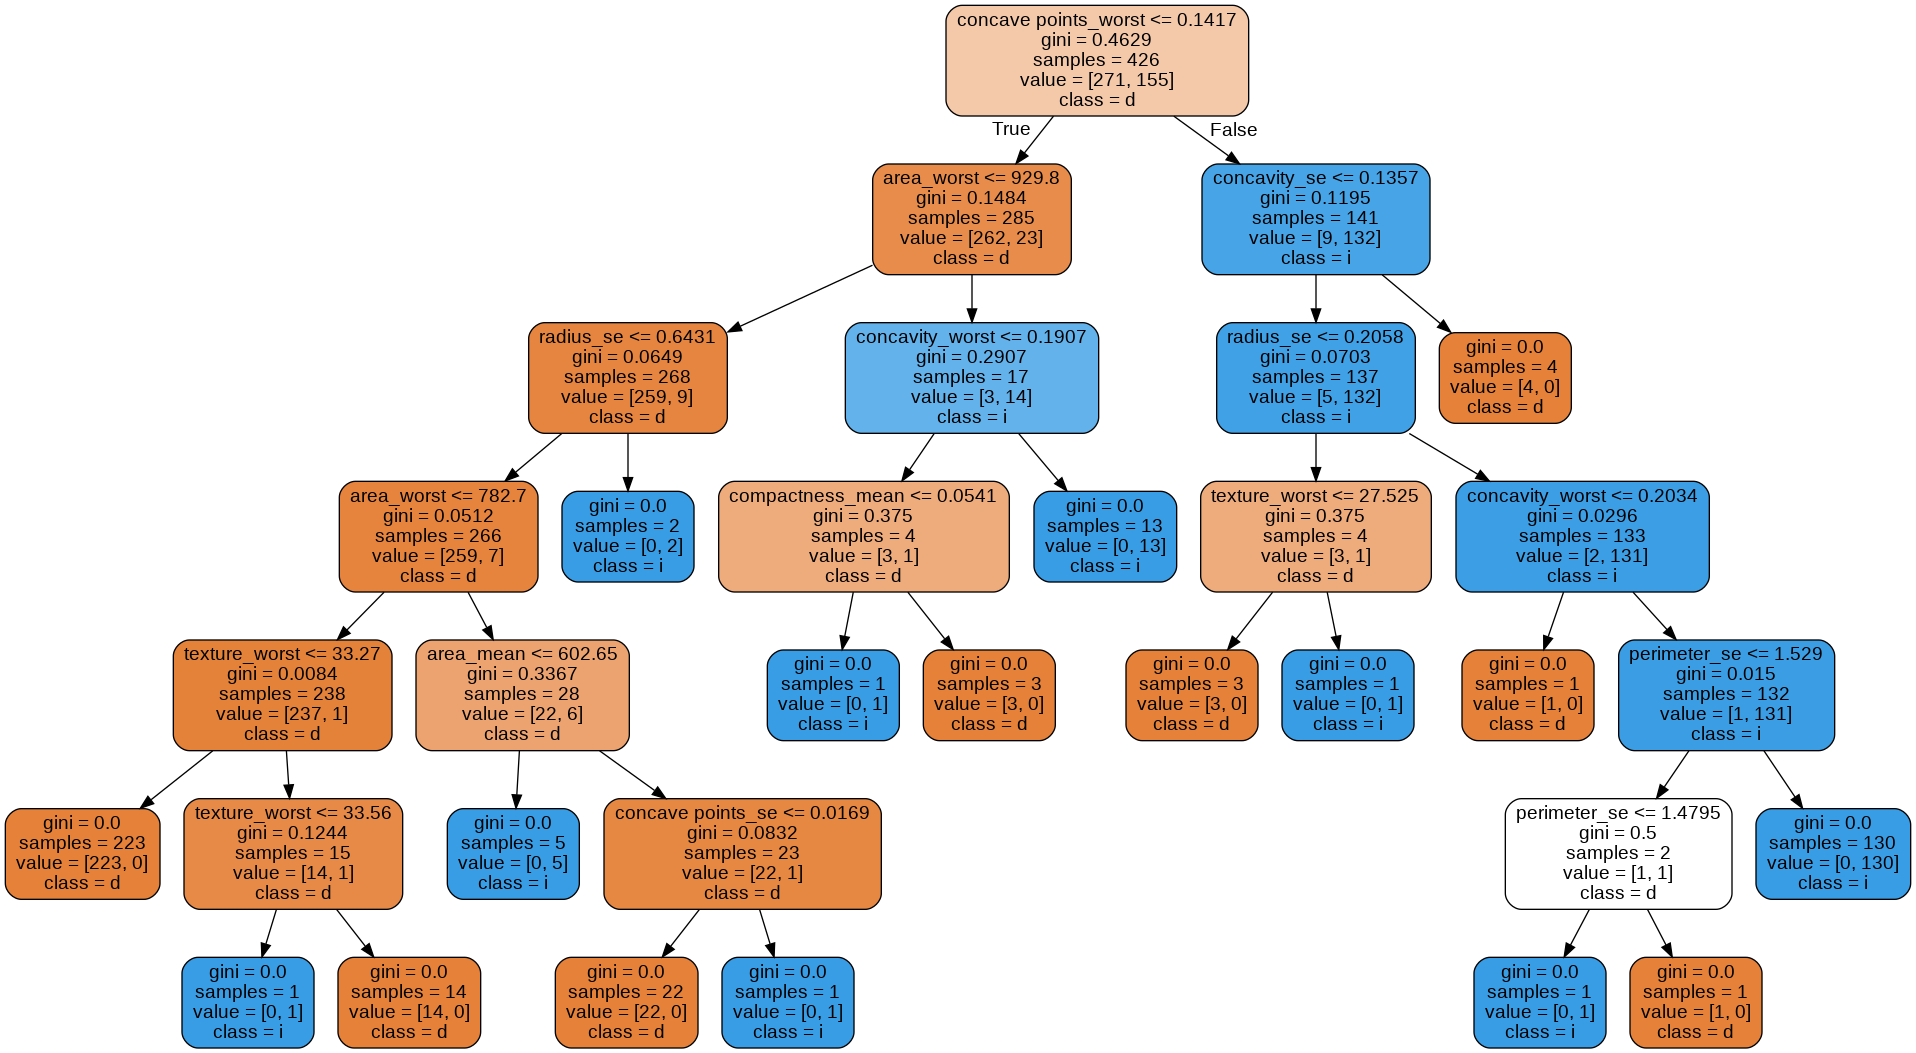

In [44]:
im=Image.open("Cancer_tree.png")
display(im)

In [45]:
ypred_train=cancer_tree.predict(x_train)
ypred_test=cancer_tree.predict(x_test)

In [46]:
from sklearn.metrics import  accuracy_score
training_score=accuracy_score(y_train,ypred_train)
test_score=accuracy_score(y_test,ypred_test)

In [47]:
print("train score accuracy {} %".format(training_score*100))
print("test score accuracy {} %".format(test_score*100))

train score accuracy 100.0 %
test score accuracy 90.20979020979021 %


In [51]:
from sklearn.metrics import classification_report
print(".....................................................................")
print("                            Train")
print(classification_report(y_train,ypred_train))
print(".....................................................................")
print("                             Test")
print(classification_report(y_test,ypred_test))
print(".....................................................................")

.....................................................................
                            Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       155

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

.....................................................................
                             Test
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        86
           1       0.84      0.93      0.88        57

    accuracy                           0.90       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143

.....................................................................


In [53]:
prune_path=cancer_tree.cost_complexity_pruning_path(x_train,y_train)

In [54]:
alphas=prune_path.ccp_alphas
print(alphas)

[0.         0.00232963 0.00233755 0.00352113 0.00352113 0.00449071
 0.0045892  0.00807788 0.00984786 0.01055625 0.01693903 0.04683338
 0.32410279]


In [55]:
impurities=prune_path.impurities
print(impurities)

[0.         0.00465927 0.00933438 0.0128555  0.01637663 0.02086734
 0.02545655 0.03353443 0.04338228 0.07505102 0.09199005 0.13882343
 0.46292623]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

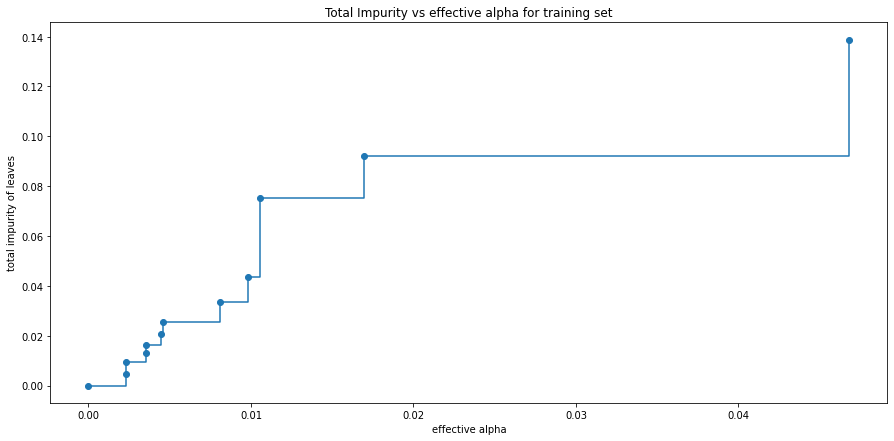

In [65]:
fig,ax=plt.subplots(figsize=(15,7))
ax.plot(alphas[:-1],impurities[:-1],marker="o",drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [70]:
new_cancer_Trees = []
i=0

for alpha in alphas:
    new_cancer_Tree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha)
    new_cancer_Tree.fit(x_train, y_train)
    
    new_cancer_Trees.append(new_cancer_Tree)
    # Export the image to a dot file
    dot_name = 'cancer_tree'+str(i)+'.dot'
    export_graphviz(new_cancer_Tree, out_file = dot_name, feature_names=features, class_names=Label, rounded = True, precision = 1, filled = True )

    # Use dot file to create a graph
    graph = gr.graph_from_dot_file(dot_name)
    
    png = 'cancer_tree'+str(i)+'.png'
    # Write graph to a png file
    graph.write_png(png)
    i=i+1

In [71]:
len(new_cancer_Trees)

13

In [72]:
node_counts=[]
for i in range(len(new_cancer_Trees)):
  node_counts.append(new_cancer_Trees[i].tree_.node_count)
  print('Number of Node in {}st tree is {}'.format(i, new_cancer_Trees[i].tree_.node_count))

Number of Node in 0st tree is 33
Number of Node in 1st tree is 29
Number of Node in 2st tree is 25
Number of Node in 3st tree is 21
Number of Node in 4st tree is 21
Number of Node in 5st tree is 19
Number of Node in 6st tree is 17
Number of Node in 7st tree is 15
Number of Node in 8st tree is 13
Number of Node in 9st tree is 7
Number of Node in 10st tree is 5
Number of Node in 11st tree is 3
Number of Node in 12st tree is 1


In [73]:
for i in range(len(new_cancer_Trees)):
  print('Number of leaves in {}st tree is {}'.format(i, new_cancer_Trees[i].get_n_leaves()))

Number of leaves in 0st tree is 17
Number of leaves in 1st tree is 15
Number of leaves in 2st tree is 13
Number of leaves in 3st tree is 11
Number of leaves in 4st tree is 11
Number of leaves in 5st tree is 10
Number of leaves in 6st tree is 9
Number of leaves in 7st tree is 8
Number of leaves in 8st tree is 7
Number of leaves in 9st tree is 4
Number of leaves in 10st tree is 3
Number of leaves in 11st tree is 2
Number of leaves in 12st tree is 1


In [74]:
depth = []
for i in range(len(new_cancer_Trees)):
  depth.append(new_cancer_Trees[i].get_depth())
  print('Depth in {}st tree is {}'.format(i, new_cancer_Trees[i].get_depth()))

Depth in 0st tree is 6
Depth in 1st tree is 6
Depth in 2st tree is 6
Depth in 3st tree is 6
Depth in 4st tree is 6
Depth in 5st tree is 5
Depth in 6st tree is 5
Depth in 7st tree is 5
Depth in 8st tree is 5
Depth in 9st tree is 2
Depth in 10st tree is 2
Depth in 11st tree is 1
Depth in 12st tree is 0


In [75]:
node_counts

[33, 29, 25, 21, 21, 19, 17, 15, 13, 7, 5, 3, 1]

In [76]:
depth

[6, 6, 6, 6, 6, 5, 5, 5, 5, 2, 2, 1, 0]

Text(0.5, 1.0, 'Depth vs alpha')

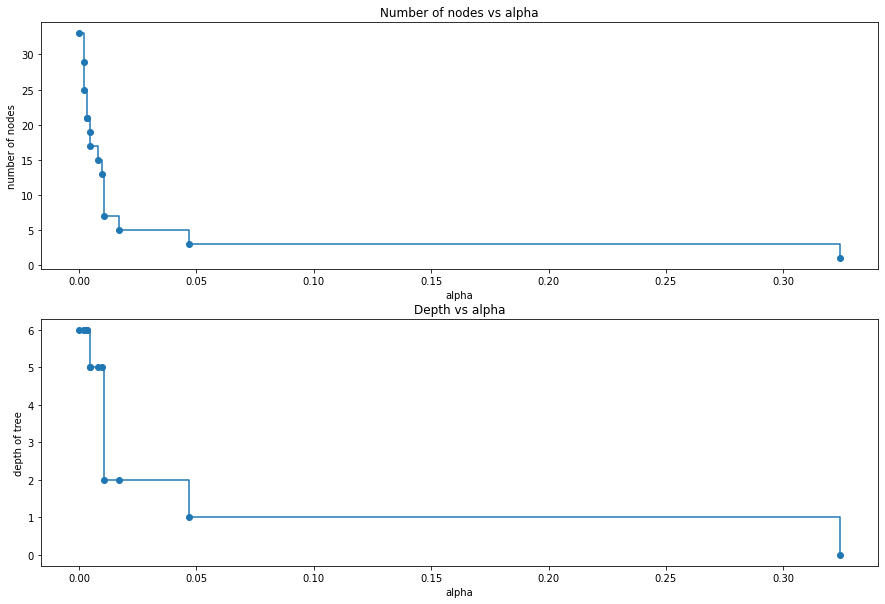

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot(alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

In [79]:
train_scores = [new_cancer_Tree.score(x_train, y_train) for new_cancer_Tree in new_cancer_Trees]
print(train_scores)
print('max f1 train_score = {}'.format(max(train_scores)))
print('position of max f1 = {}'.format(np.argmax(train_scores)))

[1.0, 0.9976525821596244, 0.9953051643192489, 0.9906103286384976, 0.9906103286384976, 0.9882629107981221, 0.9859154929577465, 0.9812206572769953, 0.9765258215962441, 0.960093896713615, 0.9507042253521126, 0.9248826291079812, 0.636150234741784]
max f1 train_score = 1.0
position of max f1 = 0


In [80]:
test_scores = [new_cancer_Tree.score(x_test, y_test) for new_cancer_Tree in new_cancer_Trees]
print('max f1 test_score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

max f1 test_score = 0.9370629370629371
position of max f1 = 9


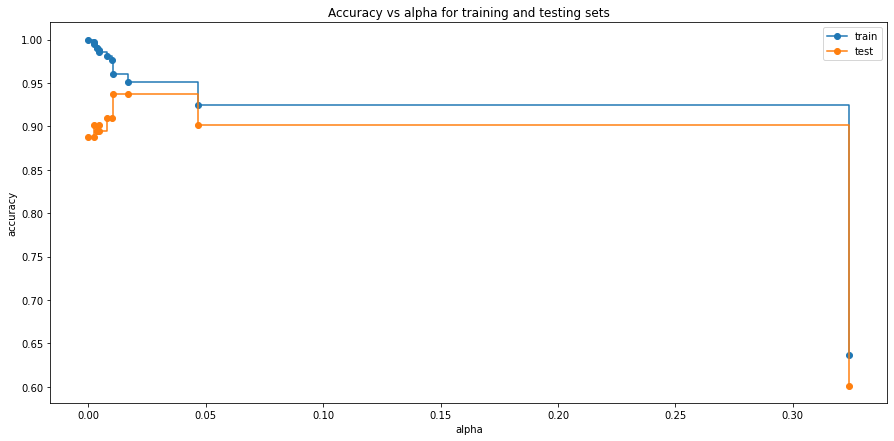

In [81]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker='o', label="train",  drawstyle="steps-post")
ax.plot(alphas, test_scores, marker='o', label="test",  drawstyle="steps-post")
ax.legend()
plt.show()

In [83]:
pruned_cancer_Tree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[9])
pruned_cancer_Tree.fit(x_train, y_train)
new_ypred_train = pruned_cancer_Tree.predict(x_train)

In [85]:
new_ypred_test = pruned_cancer_Tree.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train, new_ypred_train)
test_accuracy = accuracy_score(y_test, new_ypred_test)

In [87]:
print('Training Accuracy = {} % '.format(training_accuracy*100))
print('Test Accuracy = {} % '.format(test_accuracy*100))

Training Accuracy = 96.0093896713615 % 
Test Accuracy = 93.7062937062937 % 


In [88]:
from sklearn.metrics import classification_report
print(".....................................................................")
print("                            Train")
print(classification_report(y_train,new_ypred_train))
print(".....................................................................")
print("                             Test")
print(classification_report(y_test,new_ypred_test))
print(".....................................................................")

.....................................................................
                            Train
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       271
           1       0.95      0.94      0.94       155

    accuracy                           0.96       426
   macro avg       0.96      0.96      0.96       426
weighted avg       0.96      0.96      0.96       426

.....................................................................
                             Test
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        86
           1       0.90      0.95      0.92        57

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

.....................................................................
